In [4]:

import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import os
# Spróbuj odtworzyć negatywny wynik eskperymentu, oraz wytłumacz skąd się on bierze - czy reklamy z lokalnym burmistrzem faktycznie przyciągają mniej ludzi niż z burmistrzem Los Angeles?

# Informacje o zbiorze danych:

# test_data.csv:

# viewer_id - id użytkownika
# date - data obejrzenia reklamy "US Politics This Week"
# tv_make - producent telewizora
# tv_size - rozmiar telewizora
# uhd_capable - czy telewizor wyświetla obraz w jakość UHD
# total_time_watched - suma czasu oglądania telewizji (w godzinach) przez użytkownika w dzień w którym obejrzał reklamę
# watched - czy użytkownik obejrzał "US Politics This Week" po obejrzeniu reklamy
# test - użytkownicy są podzieleni na dwie grupy - test (1) i control (0), grupa testowa obejrzała reklamy z lokalnym burmistrzem, grupa kontrolna widziała reklamę z burmistrzem LA



# viewer_id - id użytkownika
# gender - płeć użytkownika
# age - wiek użytkownika
# city - miasto użytkownika
table1 = pd.read_csv('test_data.csv')
table2 = pd.read_csv('viewer_data.csv')

In [5]:
matrix = table1.merge(table2)
matrix

,viewer_id,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test,gender,age,city
0,24726768,2018-01-16,Sony,70,0,Comcast,10.75,0,1,Male,52,Boston
1,25001464,2018-01-18,Sony,32,0,NaN,2.75,0,0,Male,38,New York
2,28291998,2018-01-18,Sony,50,1,Dish Network,20.00,0,0,Female,38,San Francisco
3,17057157,2018-01-19,Sony,32,0,Comcast,1.50,0,0,Male,39,Philadelphia
4,29504447,2018-01-17,Sony,32,0,Comcast,17.50,0,0,Female,57,Detroit
...,...,...,...,...,...,...,...,...,...,...,...,...
417465,13816647,2018-01-15,Sony,50,0,Time Warner Cable,8.75,0,1,Female,23,Miami
417466,24376671,2018-01-18,Sony,55,1,Cox,18.00,0,1,Male,28,Dallas
417467,7424027,2018-01-19,LG,60,0,Cox,7.25,0,1,Male,55,New York
417468,40942,2018-01-15,Sony,40,1,Cox,1.75,0,0,Female,52,Los Angeles


In [7]:

head_list = ['date','tv_make','tv_size','uhd_capable','tv_provider','total_time_watched',]
unique_values =[]

for i in head_list:
    values = table1[i].unique()
    unique_values.append(values)

unique_matrix = pd.Series(unique_values)
unique_matrix
# nie ma jednej wartości dla całego zbioru

0    [2018-01-16, 2018-01-18, 2018-01-19, 2018-01-1...
1                         [Sony, LG, Philips, Toshiba]
2                     [70, 32, 50, 65, 60, 55, 43, 40]
3                                               [0, 1]
4    [Comcast, nan, Dish Network, Cox, Time Warner ...
5    [10.75, 2.75, 20.0, 1.5, 17.5, 14.75, 19.0, 8....
dtype: object

In [8]:
pd.DataFrame(matrix['date']).min()

date    2018-01-15
dtype: object

In [10]:
pd.DataFrame(matrix['date']).max()

date    2018-01-19
dtype: object

In [11]:
pd.DataFrame(matrix['date']).describe()

,date
count,417470
unique,5
top,2018-01-15
freq,86530


In [12]:
main_matrix = matrix[['viewer_id','total_time_watched','watched','test','gender','age','city']]

main_matrix['id_gender'] = 0
id_ = ['Female']
id_gender = main_matrix['gender'].isin(id_)
main_matrix.loc[id_gender,'id_gender'] =1
main_matrix[['gender', 'id_gender']].drop_duplicates()
main_matrix


<ipython-input-12-2bdc384c37fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_matrix['id_gender'] = 0
C:\Users\mrgrz\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,viewer_id,total_time_watched,watched,test,gender,age,city,id_gender
0,24726768,10.75,0,1,Male,52,Boston,0
1,25001464,2.75,0,0,Male,38,New York,0
2,28291998,20.00,0,0,Female,38,San Francisco,1
3,17057157,1.50,0,0,Male,39,Philadelphia,0
4,29504447,17.50,0,0,Female,57,Detroit,1
...,...,...,...,...,...,...,...,...
417465,13816647,8.75,0,1,Female,23,Miami,1
417466,24376671,18.00,0,1,Male,28,Dallas,0
417467,7424027,7.25,0,1,Male,55,New York,0
417468,40942,1.75,0,0,Female,52,Los Angeles,1


In [13]:
mean_time_wathced = main_matrix.groupby(main_matrix['watched'])['total_time_watched'].mean()
mean_time_wathced

watched
0    10.040506
1    10.035359
Name: total_time_watched, dtype: float64

In [15]:
test_group_city = main_matrix.groupby(main_matrix['city'])['test'].mean()
test_group_city

city
Atlanta          0.517902
Boston           0.518470
Chicago          0.514178
Dallas           0.517484
Detroit          0.512632
Houston          0.516133
Los Angeles      0.000000
Miami            0.519757
Minneapolis      0.525728
New York         0.512376
Philadelphia     0.851822
Phoenix          0.518053
San Francisco    0.518889
Seattle          0.847775
Tampa            0.517657
Name: test, dtype: float64

<AxesSubplot:title={'center':'watched local mayor'}, xlabel='city', ylabel='mean watched'>

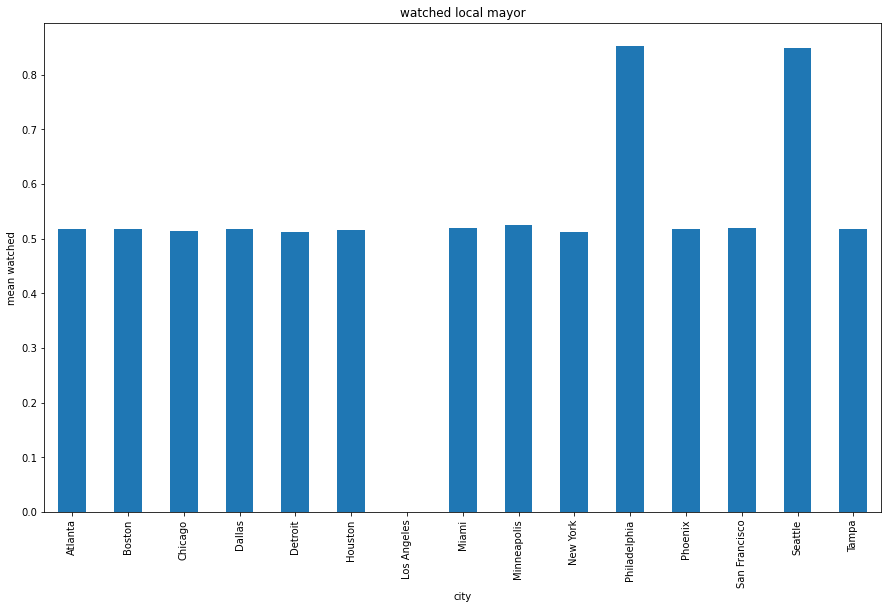

In [48]:
test_group_city.plot(
    kind ='bar',
    title = 'watched local mayor',
    xlabel= 'city',
    ylabel = 'mean watched',
    figsize = (15,9)
)

In [18]:
philadefphia = main_matrix[main_matrix['city'] == 'Philadelphia' ]
philadefphia

,viewer_id,total_time_watched,watched,test,gender,age,city,id_gender
3,17057157,1.50,0,0,Male,39,Philadelphia,0
13,10488899,1.75,0,1,Male,42,Philadelphia,0
49,17549373,7.50,0,0,Female,51,Philadelphia,1
55,5387721,1.75,0,1,Male,34,Philadelphia,0
56,20233589,10.75,0,1,Female,40,Philadelphia,1
...,...,...,...,...,...,...,...,...
417329,28247288,3.25,0,0,Male,26,Philadelphia,0
417401,5366900,18.25,0,1,Male,30,Philadelphia,0
417429,27983142,3.50,0,0,Male,28,Philadelphia,0
417436,24311011,8.75,0,1,Female,45,Philadelphia,1


In [36]:
local_mayor_phil0 = philadefphia.drop(index = philadefphia[philadefphia['test']== 0].index)
n_con = local_mayor_phil0['watched'].count()

In [37]:
local_mayor_phil0['watched'].sum()

575

In [38]:
local_mayor_phil1 = philadefphia.drop(index = philadefphia[philadefphia['test']== 1].index)
n_exp = local_mayor_phil1['watched'].count()

In [39]:
local_mayor_phil1['watched'].sum()

100

In [40]:
successes = [local_mayor_phil0['watched'].sum(), local_mayor_phil1['watched'].sum()]

In [42]:
# h0 - srednie sa równe
# h1 nie są równe
from statsmodels.stats.proportion import proportions_ztest


In [43]:
z_stat, p_val = proportions_ztest(successes, [n_con, n_exp])

In [45]:
z_stat 

0.0021921962070330747

In [47]:
p_val # nie ma podstaw do orzucenia H0

0.9982508818931211